In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv("cybersecurity_attacks.csv")
data.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [3]:
data.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

array([[<Axes: title={'center': 'Source Port'}>,
        <Axes: title={'center': 'Destination Port'}>],
       [<Axes: title={'center': 'Packet Length'}>,
        <Axes: title={'center': 'Anomaly Scores'}>]], dtype=object)

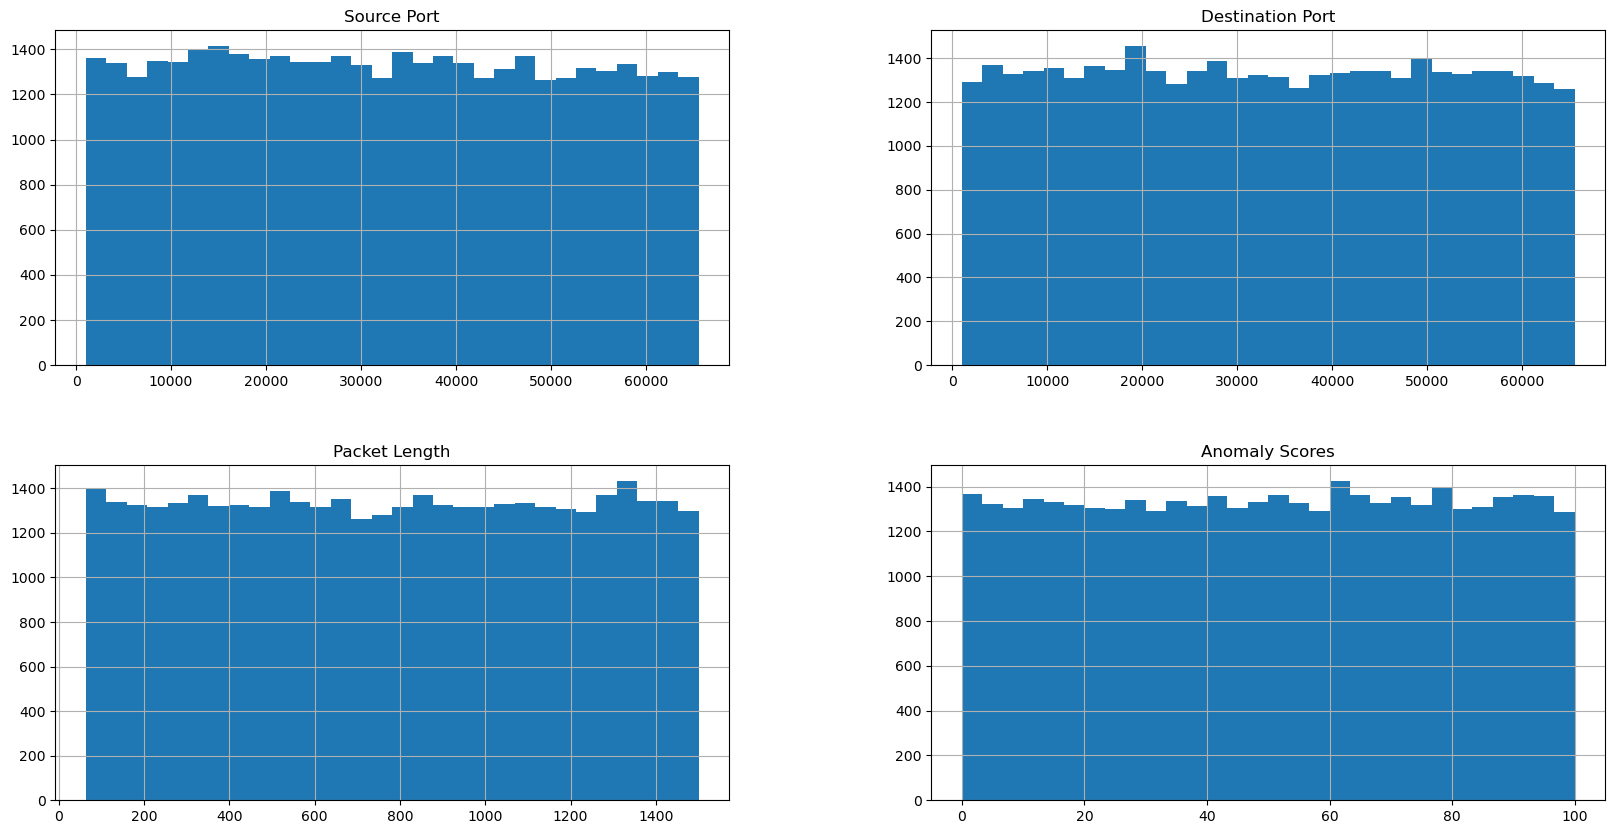

In [5]:
data.hist(bins=30,figsize=(20,10))

<Axes: title={'center': 'Distribution of Severity Level'}, xlabel='Severity Level', ylabel='count'>

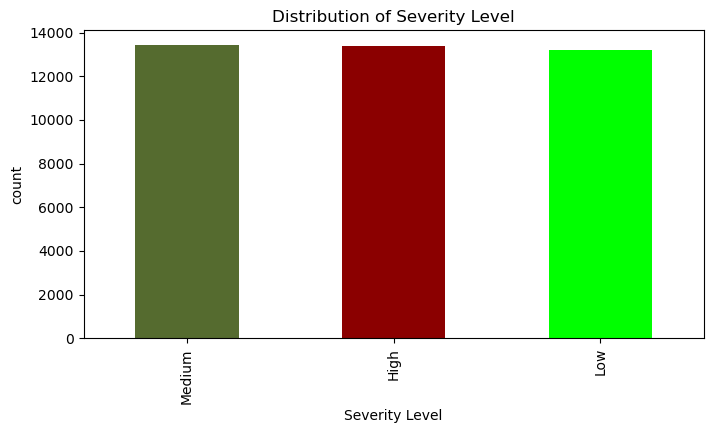

In [6]:
#Distribution of Severity Level
colors = ["DarkOliveGreen","DarkRed","Lime"]
Severity_Level_counts = data["Severity Level"].value_counts()
plt.figure(figsize=(8,4))
plt.title("Distribution of Severity Level",loc="center")
plt.xlabel("SeverityLevel")
plt.ylabel("count")
Severity_Level_counts.plot(kind="bar",color=colors)

In [7]:
Severity_top= data["Severity Level"].value_counts()
Severity_top

Severity Level
Medium    13435
High      13382
Low       13183
Name: count, dtype: int64

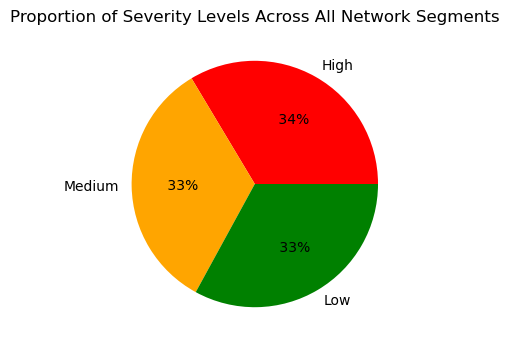

In [8]:
#Distribution of Severity Levels Across All Network Segments
colors = ['red', 'orange', 'green']
labels =  ["High","Medium","Low"]
sizes = Severity_top.values
plt.figure(figsize=(15, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%3.f%%')
plt.title('Proportion of Severity Levels Across All Network Segments')
plt.show()

In [9]:
Malacious_Columns = ["IDS/IPS Alerts","Malware Indicators","Alerts/Warnings"]
Malacious_Columns

['IDS/IPS Alerts', 'Malware Indicators', 'Alerts/Warnings']

In [10]:
top_10_users = {}
top_10_NS = {}
for column in Malacious_Columns:
    top_10_users[column] = data.groupby(["User Information"])[column].count().sort_values(ascending=False).head(10)
    top_10_NS[column] = data.groupby(["Network Segment"])[column].count().sort_values(ascending=False).head(10)

In [11]:
data[Malacious_Columns].count()

IDS/IPS Alerts        19950
Malware Indicators    20000
Alerts/Warnings       19933
dtype: int64

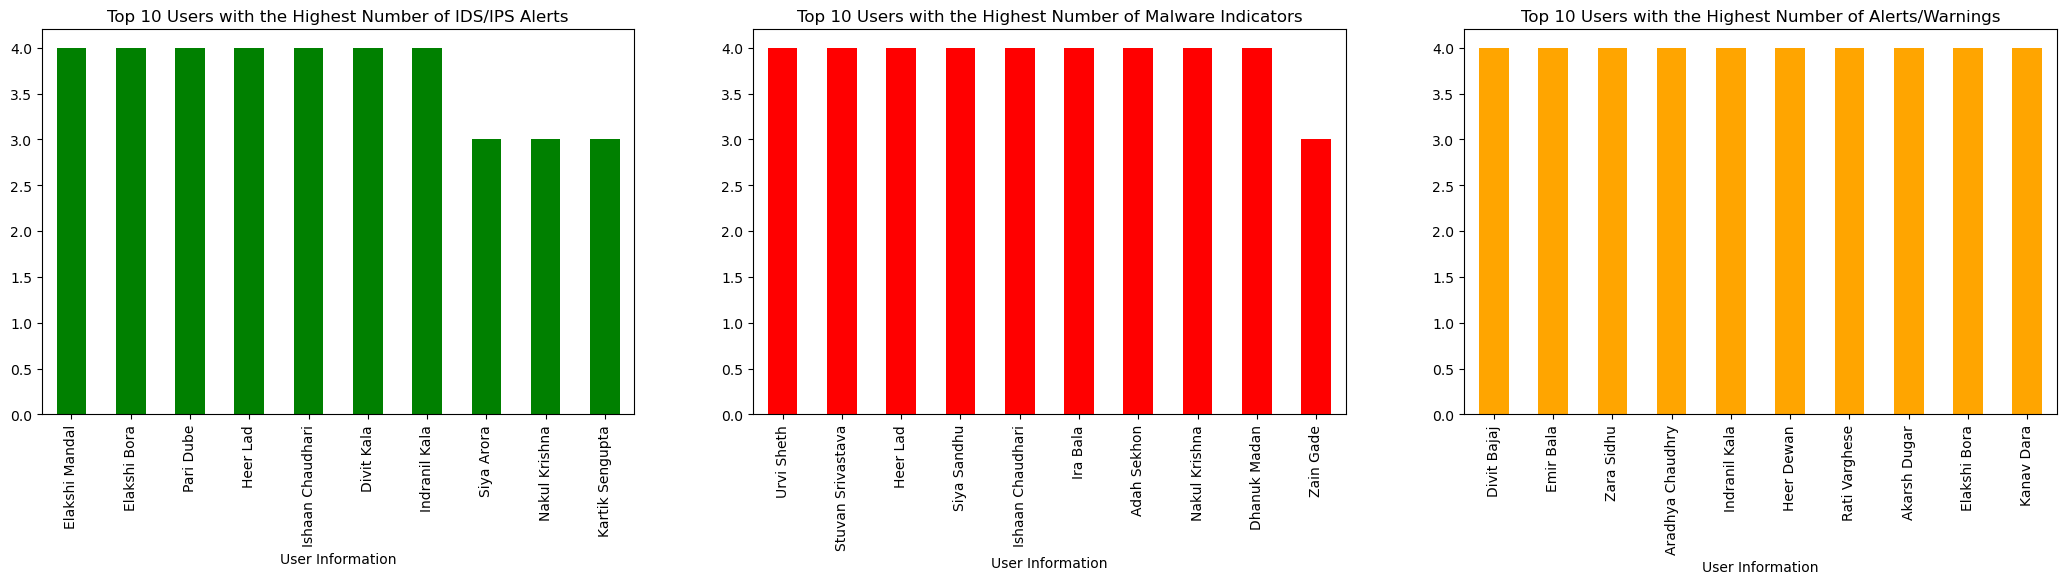

In [12]:
##Top 10 Users with Highest Alerts counts
plt.figure(figsize=(26, 17))
for index,column in enumerate(Malacious_Columns):
    plt.subplot(len(Malacious_Columns),3,index+1)
    top_10_users[column][:10].plot(kind='bar', color=colors[index-1])
    plt.title("Top 10 Users with the Highest Number of "+column)

Text(0.5, 1.0, 'Distribution of Alerts based on Network Segments ')

<Figure size 2600x1500 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

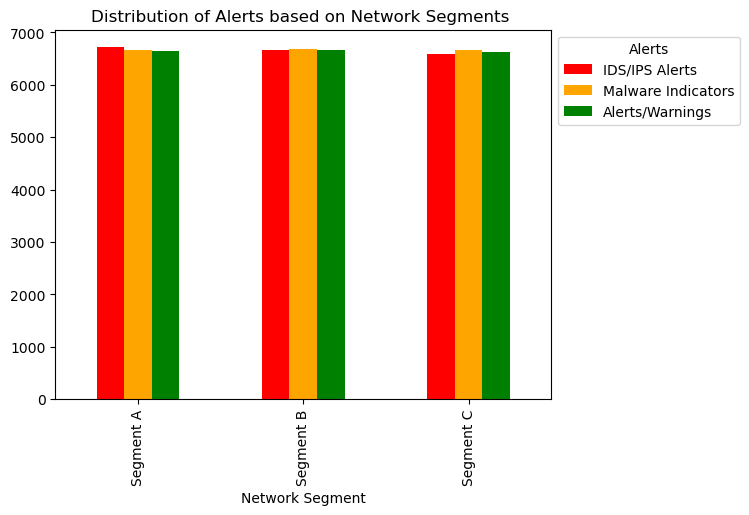

In [13]:
#Distribution of Network Segment with the Highest Number of Alerts
plt.figure(figsize=(26, 15))
Alert_total =data.dropna(subset=Malacious_Columns)
Alert_total = data.groupby("Network Segment")[Malacious_Columns].count()

plt.figure(figsize=(10,3))
Alert_total.plot(kind="bar",color=colors)
plt.legend(title='Alerts', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.title("Distribution of Alerts based on Network Segments ")

<Axes: title={'center': 'Distribution of Action Types'}, xlabel='Action Taken', ylabel='count'>

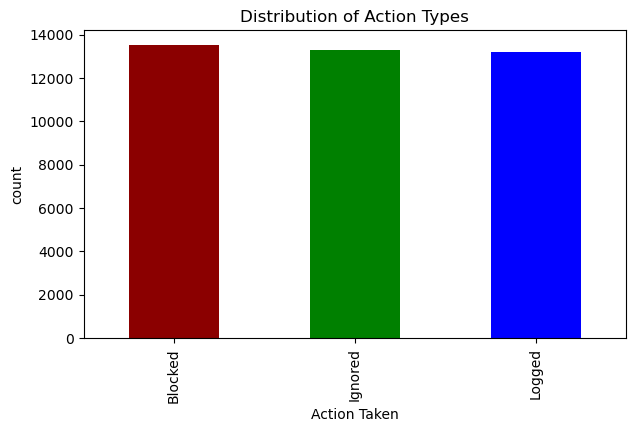

In [14]:
colors = ['darkRed', 'green', 'blue']
Action_Taken_counts = data["Action Taken"].value_counts()
plt.figure(figsize=(7,4))
plt.title("Distribution of Action Types")
plt.xlabel("Action Type")
plt.ylabel("count")
Action_Taken_counts.plot(kind="bar",color=colors)

In [15]:
Attack_lst=data["Attack Type"].dropna().unique()
Attack_lst

array(['Malware', 'DDoS', 'Intrusion'], dtype=object)

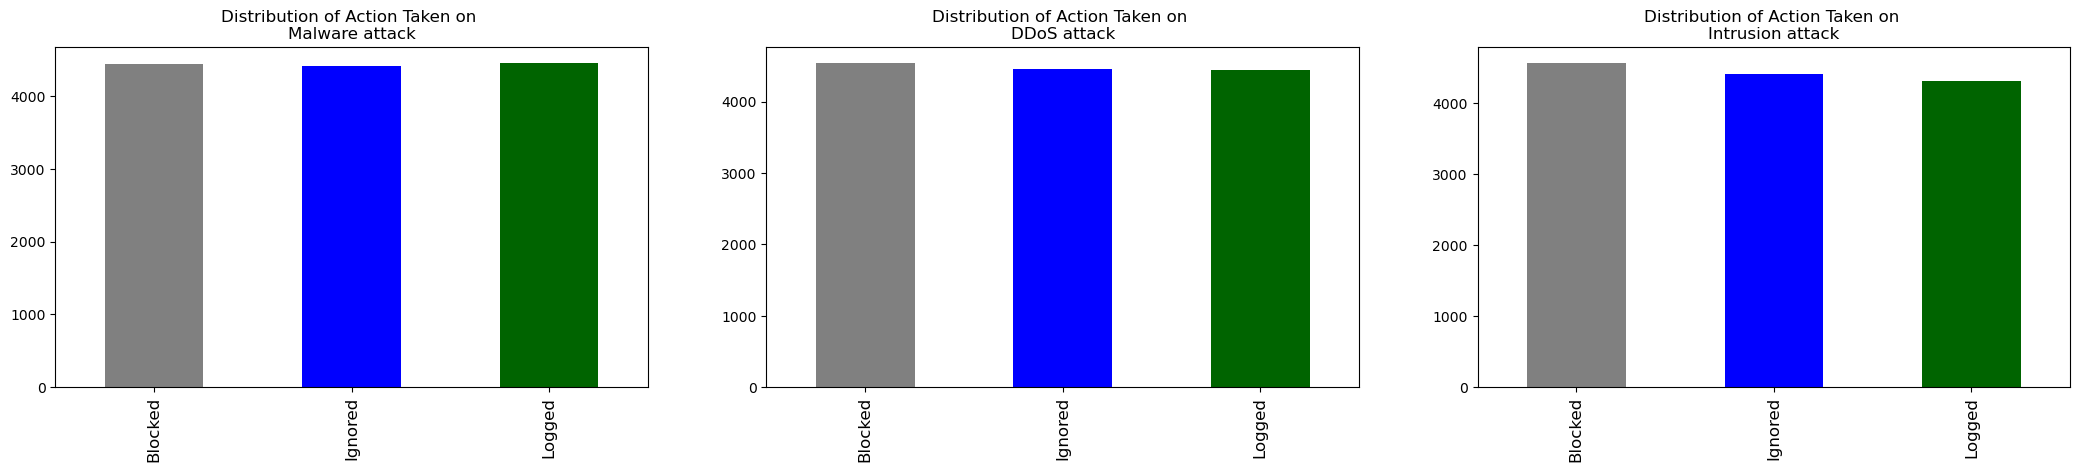

In [16]:
#Distribution of Action Taken on Each type of Attacks
plt.figure(figsize=(26, 15))
labels=["Blocked","Ignored","Logged"]
colors=["Gray","Blue","DarkGreen"]
for index,attack in enumerate(Attack_lst):
    action=data[data["Attack Type"]==attack]
    ax=plt.subplot(len(Attack_lst),3,index+1)
    plt.xlabel(labels[index])
    action.groupby("Action Taken")["Attack Type"].value_counts().plot(kind="bar",color=colors).set_xticklabels(labels,fontsize=12)
    plt.xlabel("")
    plt.title("Distribution of Action Taken on \n"+attack+" attack")
plt.show()

In [17]:
Attack_Sign=data.groupby(["Action Taken","Attack Signature"])["Action Taken"].count()

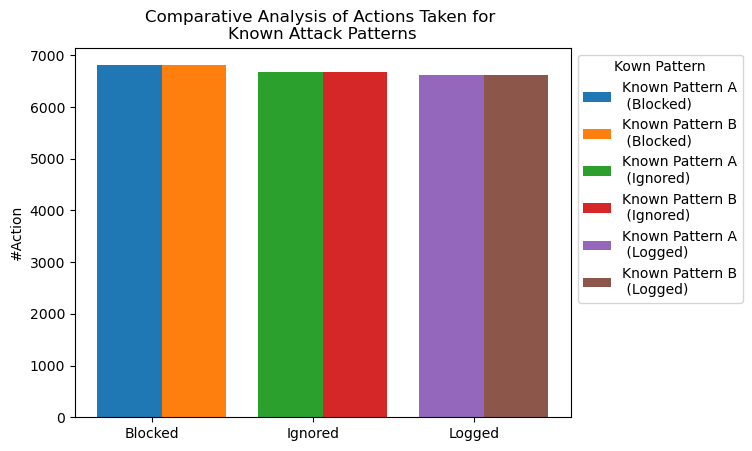

In [18]:
#Comparative Analysis of Actions Taken for Known Attack Patterns
labels = ["Blocked","Ignored","Logged"]
ind = np.arange(len(labels))
width = 0.4
fig, ax = plt.subplots()
position=0
for index , ac_type in enumerate(Attack_Sign.keys()):
    if index%2==0:
        position+=0.2
    bars1 = ax.bar(position+index*width , Attack_Sign[ac_type[0]], width, label=ac_type[1]+"\n ("+ac_type[0]+")" )
ax.set_xticklabels(labels)
ax.set_ylabel('#Action')
ax.set_title('Comparative Analysis of Actions Taken for \nKnown Attack Patterns')
ax.set_xticks(ind+0.1+position*width)
ax.legend(title='Kown Pattern', bbox_to_anchor=(1.0, 1), loc='upper left')

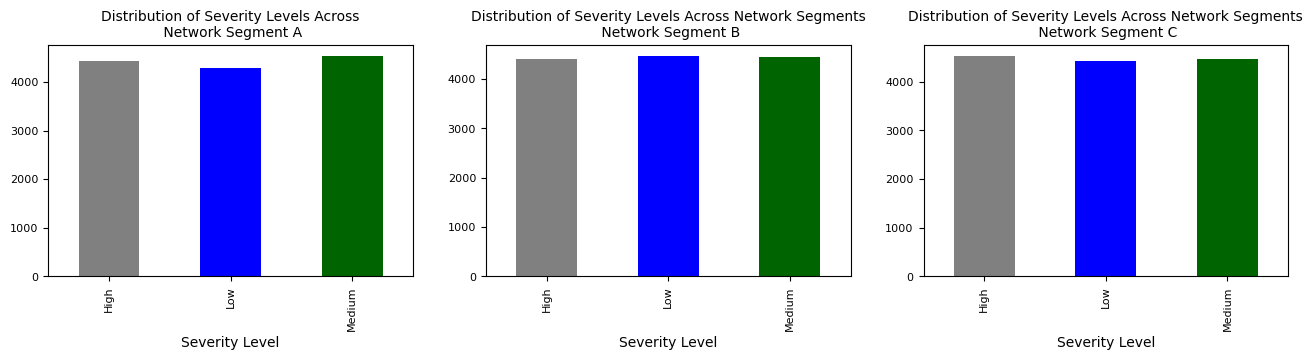

In [19]:
#Distribution of Severity Levels Across Network Segments 

Severity_NS = data.groupby("Network Segment")["Severity Level"].value_counts()
plt.figure(figsize=(16,3))
plt.subplot(1,3,1)
plt.title("Distribution of Severity Levels Across\n Network Segment A",loc="center",fontsize=10)
Severity_NS["Segment A"].sort_index().plot(kind="bar",color=colors,fontsize=8)

plt.subplot(1,3,2)
plt.title("Distribution of Severity Levels Across Network Segments\n Network Segment B",loc="center",fontsize=10)
Severity_NS["Segment B"].sort_index().plot(kind="bar",color=colors,fontsize=8)

plt.subplot(1,3,3)
plt.title("Distribution of Severity Levels Across Network Segments\n Network Segment C",loc="center",fontsize=10)
Severity_NS["Segment C"].sort_index().plot(kind="bar",color=colors,fontsize=8)
plt.show()

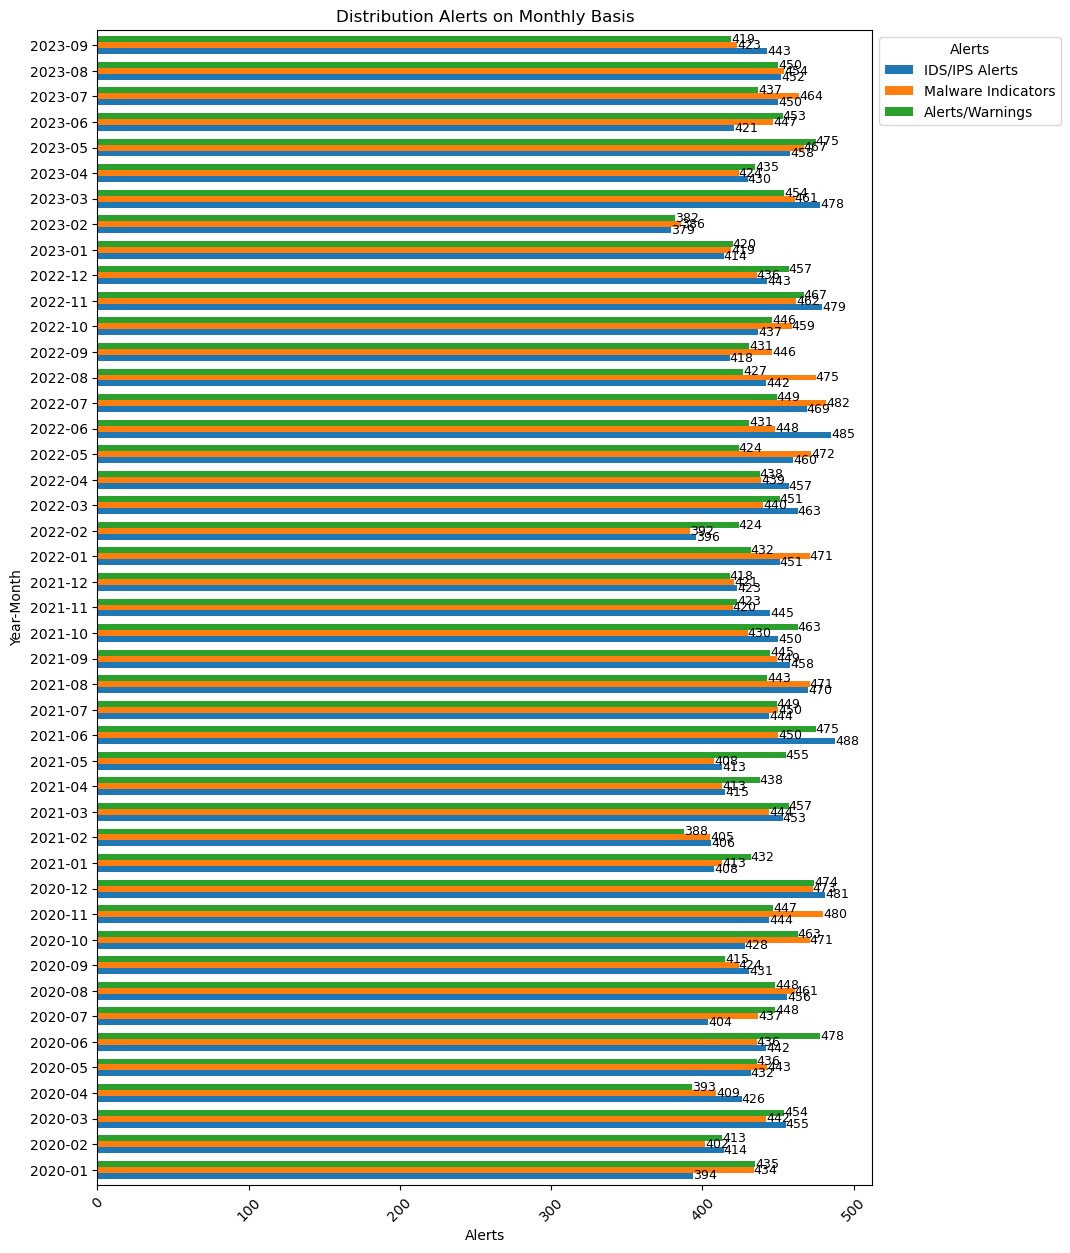

In [20]:
#Distributed Alerts on Monthly Basis
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['YearMonth'] = data['Timestamp'].dt.to_period('M')

monthly_alerts=data.groupby('YearMonth')[Malacious_Columns].count()[:-1]
ax = monthly_alerts.plot(kind="barh", stacked=False,figsize=(10, 15),width=0.7)
plt.ylabel("Year-Month")
plt.xlabel("Alerts")
plt.xticks(rotation=45)
for container in ax.containers:    
    ax.bar_label(container, label_type='edge', fontsize=9, color='black')
plt.title("Distribution Alerts on Monthly Basis")
plt.legend(title='Alerts', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

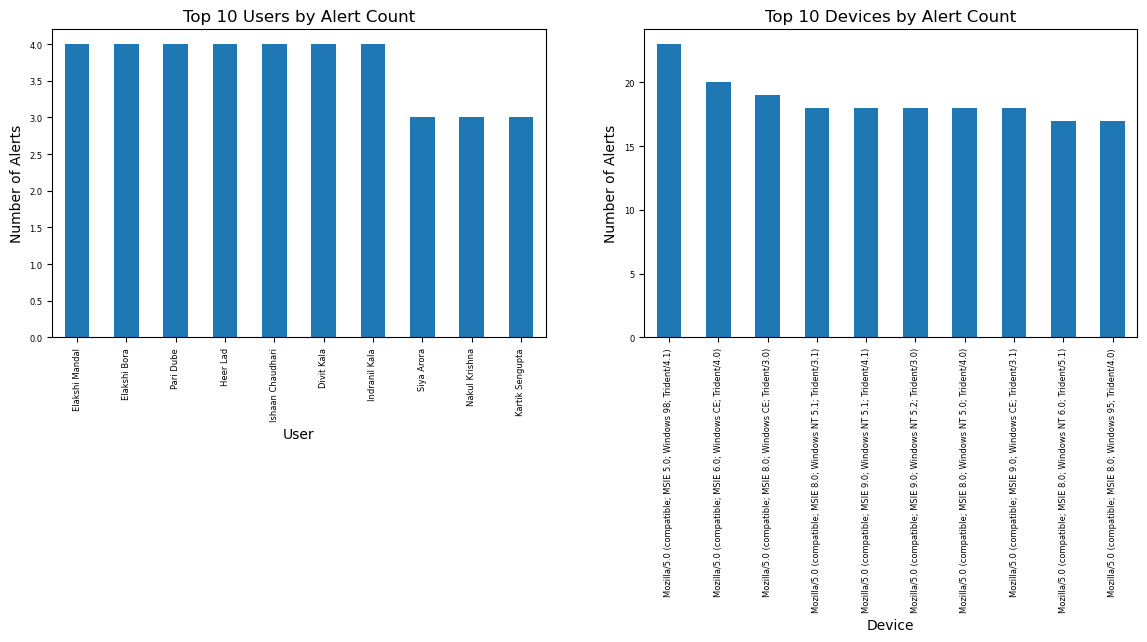

In [21]:
user_alerts = data.groupby('User Information')['IDS/IPS Alerts'].count().sort_values(ascending=False)
device_alerts = data.groupby('Device Information')['IDS/IPS Alerts'].count().sort_values(ascending=False)

plt.subplot(1,2,1)
user_alerts.head(10).plot(kind='bar', title='Top 10 Users by Alert Count',figsize=(14, 4),fontsize=6)
plt.xlabel('User')
plt.ylabel('Number of Alerts')

plt.subplot(1,2,2)
device_alerts.head(10).plot(kind='bar', title='Top 10 Devices by Alert Count',figsize=(14, 4),fontsize=6)
plt.xlabel('Device')
plt.ylabel('Number of Alerts')
plt.show()


In [22]:
# Aggregating attack types and severity levels by month
monthly_attack_types = data.groupby(['YearMonth', 'Attack Type']).size().unstack(fill_value=0)
monthly_severity_levels = data.groupby(['YearMonth', 'Severity Level']).size().unstack(fill_value=0)

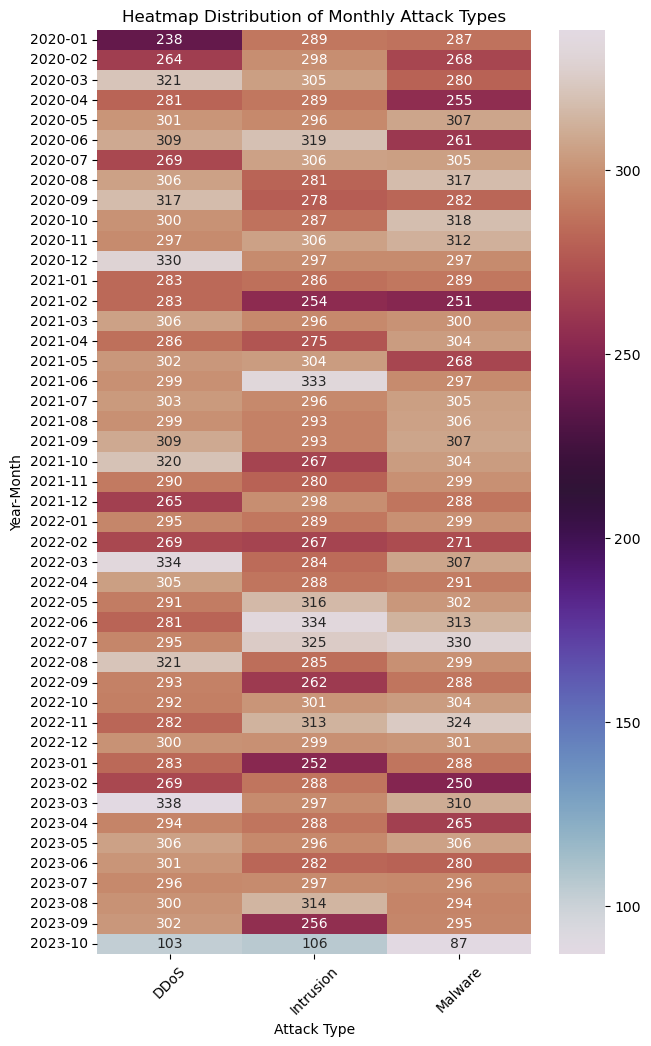

In [23]:
plt.figure(figsize=(7,12))
sns.heatmap(monthly_attack_types, annot=True, cmap='twilight', fmt='g')  
plt.title('Heatmap Distribution of Monthly Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Year-Month')
plt.xticks(rotation=45) 
plt.show()

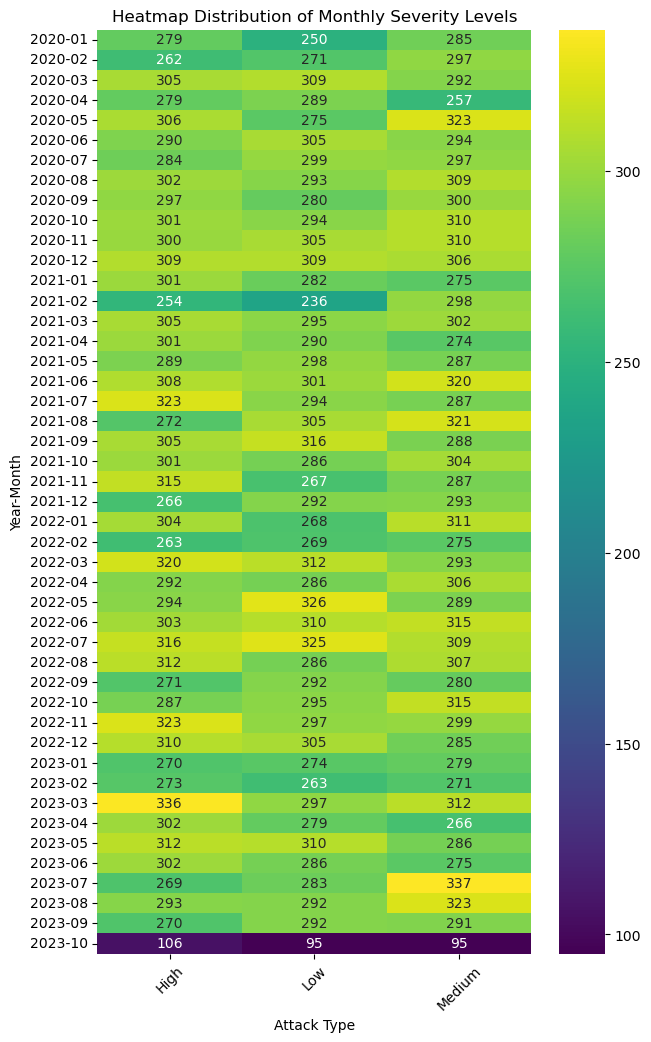

In [24]:
plt.figure(figsize=(7,12))
sns.heatmap(monthly_severity_levels, annot=True, cmap='viridis', fmt='g')  
plt.title('Heatmap Distribution of Monthly Severity Levels')
plt.xlabel('Attack Type')
plt.ylabel('Year-Month')
plt.xticks(rotation=45) 
plt.show()

<Axes: title={'center': 'Distribution of Abnormal Events on Network Segments'}, ylabel='Network Segment'>

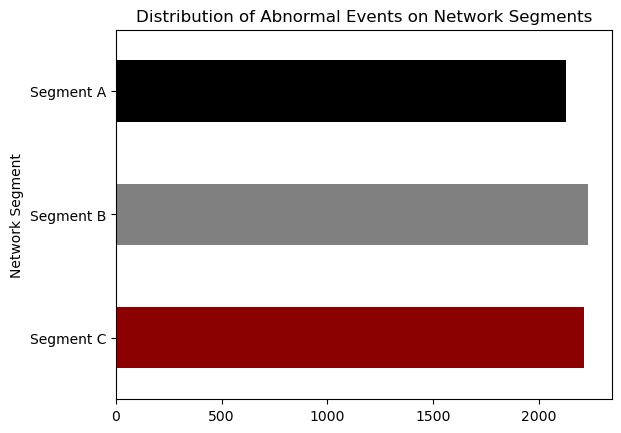

In [25]:
filtered_data_M = data[(data['Malware Indicators'].notna()) & (data['Action Taken'] == 'Ignored')]
plt.title("Distribution of Abnormal Events on Network Segments")
f=filtered_data_M.groupby("Network Segment").count()
f["Malware Indicators"].sort_index(ascending=False).plot(kind="barh",color=["darkred","gray","black"])

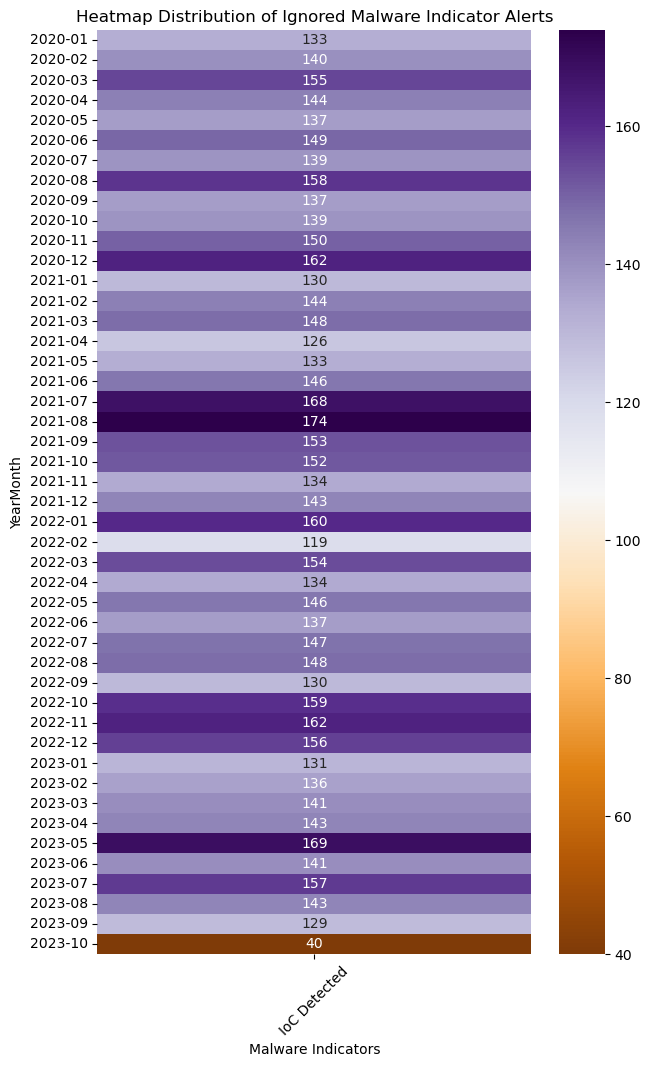

In [26]:
monthly_filtered_data_M=filtered_data_M.groupby(["YearMonth","Malware Indicators"]).size().unstack(fill_value=0)
plt.figure(figsize=(7,12))

ax.set_xticklabels(["#Ignored IoC Alert"]) 
plt.title('Heatmap Distribution of Ignored Malware Indicator Alerts')
plt.xticks(rotation=45)
ax.set_xlabel("",fontsize=12)
ax.set_ylabel("Year and Month")
ax=sns.heatmap(monthly_filtered_data_M, annot=True, cmap='PuOr', fmt='g')